# ArchR multi-sample recipe step 4 -- (optionally) prepare some visualizations of the data
**Author**: Adam Klie (last modified: 11/06/2023)<br>
***
**Description**: This script runs 

In [1]:
# Load libraries
suppressMessages(library(Seurat))
suppressMessages(library(ArchR))
suppressMessages(library(parallel))
suppressMessages(library(tidyverse))

Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘SummarizedExperiment’ was built under R version 4.3.2”
Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”


In [6]:
# Params
archr_proj_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/archr"
umap_plot_vars = c("Sample", "Clusters", "timepoint", "annotation")
marker_genes = c("INS", "GCG", "TPH1")
threads = 4
seed = 1234

In [3]:
# Move the working directory 
set.seed(seed)
addArchRThreads(threads)
setwd(archr_proj_path)

Setting default number of Parallel threads to 4.



The precompiled version of the hg38 genome in ArchR uses BSgenome.Hsapiens.UCSC.hg38, TxDb.Hsapiens.UCSC.hg38.knownGene, org.Hs.eg.db, and a blacklist that was merged using ArchR::mergeGR() from the hg38 v2 blacklist regions and from mitochondrial regions that show high mappability to the hg38 nuclear genome from Caleb Lareau and Jason Buenrostro. To set a global genome default to the precompiled hg38 genome:

In [4]:
# Add annotation
addArchRGenome("hg38")

Setting default genome to Hg38.



# Load the ArchR project

In [5]:
# Load the ArchR project
proj = loadArchRProject(path = "./")
proj

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/archr 
samples(3): dm35a dm45a dm25a
sampleColData names(1): ArrowFiles
cellColData names(23): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 11054
medianTSS(1): 12.305
medianFrags(1): 19913

# UMAPs

In [8]:
# Plot based passed in vars
p <- c()
for (i in umap_plot_vars) {
    p[[i]] <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = i, embedding = "UMAP")
}

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-d11a74f09569-Date-2024-03-04_Time-10-16-13.802734.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-d11a74f09569-Date-2024-03-04_Time-10-16-13.802734.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-d11a244a717d-Date-2024-03-04_Time-10-16-34.540091.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-d11a244a717d-Date-2024-03-04_Time-10-16-34.540091.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-d11a3f13dd5-Date-2024-03-04_Time-10-16-35.433302.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-d11

In [9]:
# Save all the UMAPs
plotPDF(
    plotList = p, 
    name = "Plot-UMAP-Sample-Clusters-Annotation.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, 
    width = 5, 
    height = 5
)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



# Marker features

In [10]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "annotation",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-d11a2f301e4-Date-2024-03-04_Time-10-19-42.261879.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Double.Matrix

2024-03-04 10:19:42.759669 : Matching Known Biases, 0.004 mins elapsed.

###########
2024-03-04 10:22:04.0249 : Completed Pairwise Tests, 2.359 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-d11a2f301e4-Date-2024-03-04_Time-10-19-42.261879.log



In [11]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.10 & Log2FC >= 0.5")
markerList$SC.beta

DataFrame with 94 rows and 9 columns
      seqnames     start       end  strand      name     idx    Log2FC
         <Rle>   <array>   <array> <array>   <array> <array> <numeric>
18069     chr4  90127535  91601913       1    CCSER1     535  0.791953
17737     chr4  30720415  31146805       1     PCDH7     203  0.891490
5256     chr12  21354959  21379978       1      IAPP     271  2.421697
5255     chr12  21419594  21264600       2   SLCO1A2     270  1.508384
2344      chr1 236142505 236221865       1   GPR137B    2344  0.740351
...        ...       ...       ...     ...       ...     ...       ...
8819     chr16  20576427  20536226       2    ACSM2B     334  0.918734
7568     chr14 101044198 101044283       1 MIR1185-2     750  0.981400
1141      chr1 107897223 107897304       1   MIR7852    1141  0.719657
18630     chr5  33984730  33944616       2   SLC45A2     137  0.535144
13033     chr2  12199130  12199201       1   MIR3681      84  0.717028
              FDR  MeanDiff
        <num

In [12]:
heatmapGS <- markerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.10 & Log2FC >= 0.5", 
  labelMarkers = marker_genes,
  transpose = TRUE
)

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-d11a2356993-Date-2024-03-04_Time-10-22-05.372014.log
If there is an issue, please report to github with logFile!



Printing Top Marker Genes:

endocrine_progenitor:

	HES3, LINC01672, NFIA, NFIA-AS2, NFIA-AS1, KANK4, ADGRL2, DDAH1, CYR61, NES, NUAK2, RAB7B, KCNK2, MIR7162, PRF1

other:

	HES3, LINC01672, LOC101929721, NFIA, NFIA-AS2, NFIA-AS1, KANK4, LINC01360, ADGRL2, DDAH1, CYR61, LINC01787, DPYD-AS2, MIR7852, LINC01649

proliferating_alpha:

	HES3, LINC01672, LOC101929721, NFIA, NFIA-AS2, NFIA-AS1, KANK4, LINC01360, ADGRL2, DDAH1, CYR61, LINC01787, DPYD-AS2, MIR7852, LINC01649

SC.alpha:

	C1orf137, MIR190B, LEMD1-AS1, AVPR1B, FCAMR, LINC01653, VIM-AS1, VIM, SLC39A12-AS1, TNNI2, PRG2, LOC283194, CFAP300, YAP1, C3AR1

SC.beta:

	LINC01649, S100A1, FMO2, MIR181B1, LINC01655, GPR137B, ERO1B, EDARADD, BECN2, LINC00701, AKR1C3, AKR1C4, TUBAL3, MIR603, GPR158

SC.delta:

	SALL1, TG, TLE4, PTCH1, HES3, LINC01672, LOC101929721, NFIA, NFIA-AS2, NFIA-AS1, KANK4, LINC01360, ADGRL2, DDAH1, CYR61

SC.EC:

	LOC101929721, LINC01360, LINC01787, DPYD-AS2, HSD17B7, GORAB-AS1, BRINP3, LINC01351, LINC01720, CFHR1, 

[1] "INS"  "GCG"  "TPH1"


Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.3.2”
Adding Annotations..

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-d11a2356993-Date-2024-03-04_Time-10-22-05.372014.log



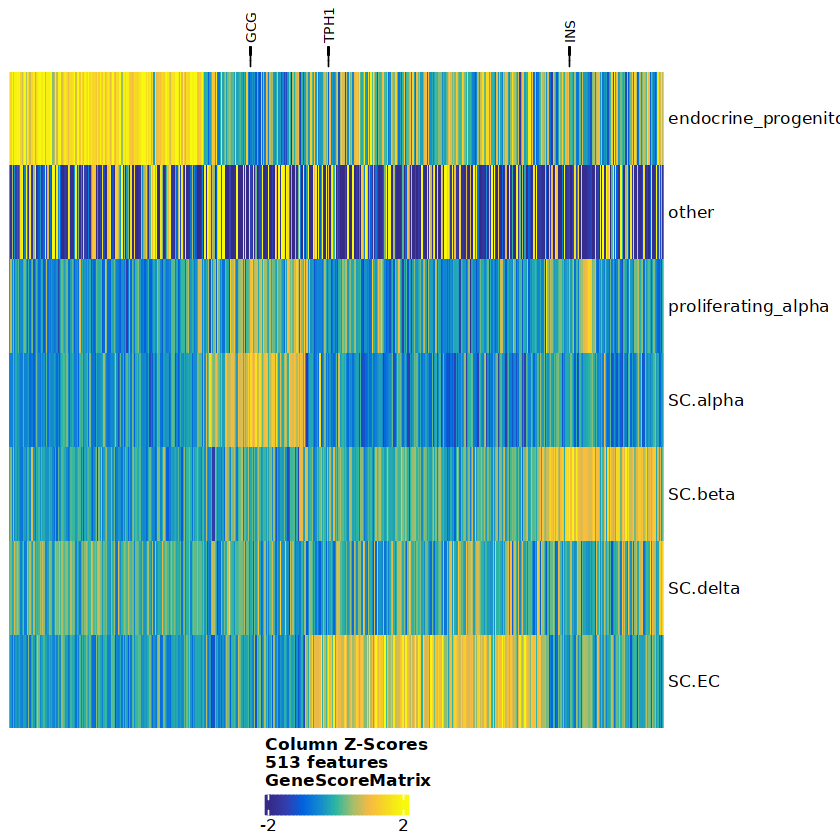

In [13]:
ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [14]:
plotPDF(heatmapGS, name = "GeneScores-Marker-Heatmap", width = 8, height = 6, ArchRProj = proj, addDOC = FALSE)

Plotting ComplexHeatmap!



In [15]:
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = marker_genes,
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-d11a7eea12f7-Date-2024-03-04_Time-10-22-18.881598.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-04 10:22:19.430386 : 



Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-d11a7eea12f7-Date-2024-03-04_Time-10-22-18.881598.log



Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


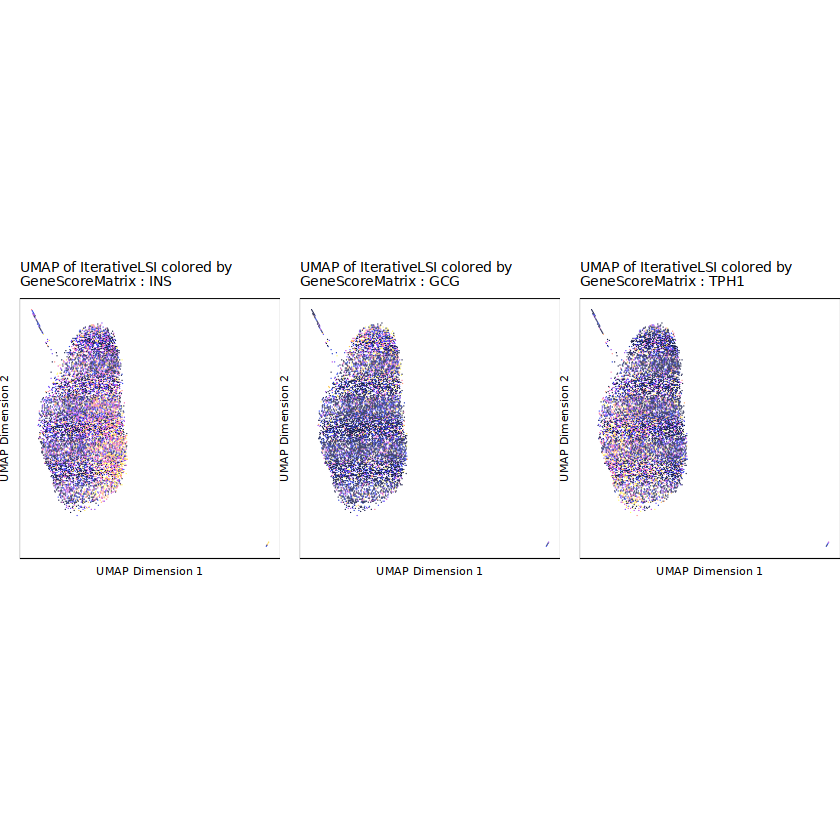

In [16]:
# Plot in the notebook
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [17]:
# Pre impute
plotPDF(
    plotList = p, 
    name = "Plot-UMAP-Marker-Genes-WO-Imputation.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5
)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



# After imputation

In [18]:
# Impute
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-d11aa3c90cf-Date-2024-03-04_Time-10-22-31.621577.log
If there is an issue, please report to github with logFile!

2024-03-04 10:22:31.784463 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Filtering 1 dims correlated > 0.75 to log10(depth + 1)



In [19]:
# Post impute
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = marker_genes,
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-d11a29d45d31-Date-2024-03-04_Time-10-22-59.935532.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-04 10:23:00.465791 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-d11a29d45d31-Date-2024-03-04_Time-10-22-59.935532.log



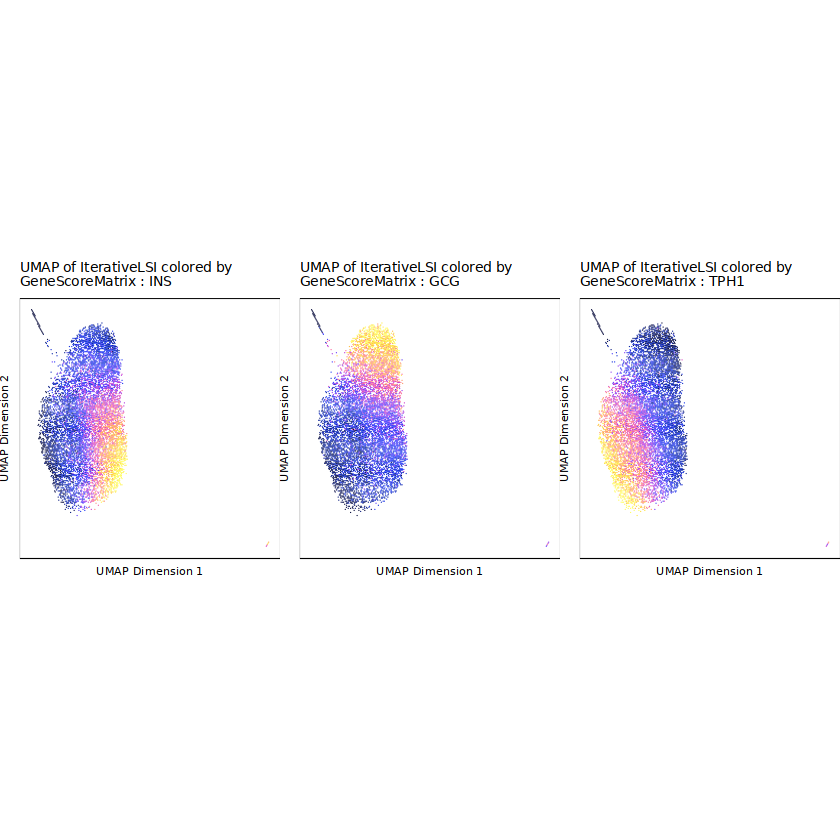

In [20]:
# Rearrange for grid plotting
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [21]:
plotPDF(
    plotList = p, 
    name = "Plot-UMAP-Marker-Genes-W-Imputation.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5
)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



# Browser tracks

In [24]:
p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "annotation", 
    geneSymbol = marker_genes,
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-d11a4614366b-Date-2024-03-04_Time-10-26-26.041092.log
If there is an issue, please report to github with logFile!



2024-03-04 10:26:26.230864 : Validating Region, 0.003 mins elapsed.



GRanges object with 3 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr11     2159779-2161341      - |        3630         INS
  [2]     chr2 162142873-162152404      - |        2641         GCG
  [3]    chr11   18017564-18042426      - |        7166        TPH1
  -------
  seqinfo: 24 sequences from hg38 genome


2024-03-04 10:26:26.345535 : Adding Bulk Tracks (1 of 3), 0.005 mins elapsed.

2024-03-04 10:26:33.71017 : Adding Feature Tracks (1 of 3), 0.128 mins elapsed.

2024-03-04 10:26:33.847058 : Adding Gene Tracks (1 of 3), 0.13 mins elapsed.

2024-03-04 10:26:34.367152 : Plotting, 0.139 mins elapsed.

2024-03-04 10:26:35.879965 : Adding Bulk Tracks (2 of 3), 0.164 mins elapsed.

2024-03-04 10:26:42.265505 : Adding Feature Tracks (2 of 3), 0.27 mins elapsed.

2024-03-04 10:26:42.372317 : Adding Gene Tracks (2 of 3), 0.272 mins elapsed.

2024-03-04 10:26:42.737601 : Plotting, 0.278 mins elapsed.

2024-03-04 10:26:43.935762 : Adding Bulk Tracks (3 of 3), 0.298 mins elapsed.

2024-03-04 10:26:47.942893 : Adding Feature Tracks (3 of 3), 0.365 mins elapsed.

2024-03-04 10:26:48.043308 : Adding Gene Tracks (3 of 3), 0.367 mins elapsed.

2024-03-04 10:26:48.386658 : Plotting, 0.372 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-d11a4614366b-Date-2024-03-04_Time-10-26-

In [25]:
# Plot the pdf
plotPDF(
    plotList = p, 
    name = "Plot-Tracks-Marker-Genes.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5
)

Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


# DONE!

---